**Dataset loading and preparation for handwritten digit recognition**

**There are around 60,000 training photos and 10,000 testing images in the dataset** 


In [25]:
from keras import backend as K
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

**The data size is (60000,28,28), which translates to 60000 photos of 28 x 28 pixels each.**

**However, we require a 4-dimensional array dataset to apply Keras ,  thus we must transform the 3-D data into a 4-D dataset.**

In [26]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

**Normalizing the data, for which first the data is convered to float and then it is divided by 255**

In [27]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
 
x_train /= 255
x_test /= 255

**Building the Model**

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
#################################### Creating a neural networknow ###################
model = Sequential()

model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation=tf.nn.relu))

model.add(Dropout(0.2))

model.add(Dense(10,activation=tf.nn.softmax))

**Compiling and fitting the Model**

In [29]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10 , batch_size=64)

K.set_value(model.optimizer.learning_rate, 0.1)
print("Learning rate :", model.optimizer.learning_rate.numpy())



Epoch 1/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2288 - accuracy: 0.9321
Epoch 2/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0934 - accuracy: 0.9712
Epoch 3/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0628 - accuracy: 0.9808
Epoch 4/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0479 - accuracy: 0.9851
Epoch 5/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0405 - accuracy: 0.9872
Epoch 6/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0314 - accuracy: 0.9899
Epoch 7/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0266 - accuracy: 0.9908
Epoch 8/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0235 - accuracy: 0.9922
Epoch 9/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0192 - accuracy: 0.9934
Epoch 10/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0184 - accuracy: 0.9940

In [30]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.05378325283527374
Test accuracy: 0.9857000112533569


Text(0.5, 1.0, 'Predicted Label: 2')

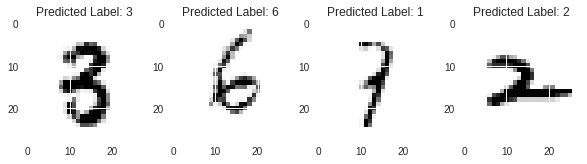

In [31]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
 
plt.figure(figsize=(10,10))
plt.subplot(4,4,1)
image_index = 2853
predict = x_test[image_index].reshape(28,28)
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
plt.title("Predicted Label: "+str(pred.argmax()))
 
plt.subplot(4,4,2)
image_index = 2000
predict = x_test[image_index].reshape(28,28)
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
plt.title("Predicted Label: "+str(pred.argmax()))
 
plt.subplot(4,4,3)
image_index = 1500
predict = x_test[image_index].reshape(28,28)
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
plt.title("Predicted Label: "+str(pred.argmax()))
 
plt.subplot(4,4,4)
image_index = 1345
predict = x_test[image_index].reshape(28,28)
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
plt.title("Predicted Label: "+str(pred.argmax()))

In [32]:
model.summary()
model.save("Assigment_3_20190183_20190593_model2.h5")

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 28)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 4732)              0         
                                                                 
 dense_6 (Dense)             (None, 128)               605824    
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                      